In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("william2020/marine-microplastics")

print("Path to dataset files:", path)

c:\Users\isaw9\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\isaw9\.cache\kagglehub\datasets\william2020\marine-microplastics\versions\1


In [2]:
import pandas as pd

In [3]:
df_mp = pd.read_csv("../Archivos/Marine_Microplastics.csv")
df_mp.head()

,OBJECTID,Oceans,Regions,SubRegions,Sampling Method,Measurement,Unit,Density Range,Density Class,Short Reference,...,Organization,Keywords,Accession Number,Accession Link,Latitude,Longitude,Date,GlobalID,x,y
0,9676,Atlantic Ocean,NaN,NaN,Grab sample,0.018,pieces/m3,0.005-1,Medium,Barrows et al.2018,...,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,-31.696000,-48.560000,8/11/2015 12:00:00 AM,a77121b2-e113-444e-82d9-7af11d62fdd2,-48.560000,-31.696000
1,6427,Pacific Ocean,NaN,NaN,Neuston net,0.000,pieces/m3,0-0.0005,Very Low,Law et al.2014,...,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,6.350000,-121.850000,12/18/2002 12:00:00 AM,be27c450-02ca-4261-8d89-cae21108e6cc,-121.850000,6.350000
2,10672,Pacific Ocean,NaN,NaN,Manta net,0.013,pieces/m3,0.005-1,Medium,Goldstein et al.2013,...,Scripps Institution of Oceanography-University...,Great Pacific Garbage Patch/SEAPLEX,253448,https://www.ncei.noaa.gov/access/metadata/land...,0.500000,-95.350000,10/17/2006 12:00:00 AM,23effcdd-35b7-4e1e-adb4-390693a287d3,-95.350000,0.500000
3,13921,Atlantic Ocean,NaN,NaN,Aluminum bucket,1368.000,pieces/m3,>=10,Very High,Queiroz et al.2022,...,"Federal University of Pará, Brazil",Amazon Continental Shelf,276482,https://www.ncei.noaa.gov/access/metadata/land...,0.631825,-45.398158,10/17/2018 12:00:00 AM,16d77822-0533-4116-97b9-0bdb592f3d6e,-45.398158,0.631825
4,9344,Pacific Ocean,NaN,NaN,Grab sample,0.001,pieces/m3,0.0005-0.005,Low,Barrows et al.2018,...,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,16.623000,-99.697800,1/3/2015 12:00:00 AM,b9e435e3-9e86-4143-8b51-877e5dcdc7a6,-99.697800,16.623000


In [4]:
df_mp.isna().sum()/df_mp.shape[0]*100

OBJECTID             0.000000
Oceans               1.326805
Regions             56.499388
SubRegions          93.600979
Sampling Method      0.000000
Measurement         28.455324
Unit                 0.000000
Density Range        0.000000
Density Class        0.000000
Short Reference      0.000000
Long Reference       0.000000
DOI                  0.000000
Organization         0.000000
Keywords             0.088127
Accession Number     0.000000
Accession Link       0.000000
Latitude             0.000000
Longitude            0.000000
Date                 0.000000
GlobalID             0.000000
x                    0.000000
y                    0.000000
dtype: float64

In [5]:
df_mp.shape

(20425, 22)

In [6]:
df_mp['Measurement'].describe()

count     14613.000000
mean        161.983976
std        2198.862484
min           0.000000
25%           0.000000
50%           0.008640
75%           0.128412
max      110480.000000
Name: Measurement, dtype: float64

In [7]:
# En primer lugar se realizará una visión de nulos y duplicados.

df_mp.duplicated().sum() # No hay duplicados 😀

np.int64(0)

In [ ]:
# Gestión de nulos para:Oceans, Regions, Subregions y Mesurement.

In [9]:
df_mp['SubRegions'].unique()

array([nan, 'Eastern Basin', 'Ligurian Sea', 'Tampa Bay', 'Aegean Sea',
       'Western Basin', 'Alboran Sea', 'Balearic Sea', 'Tyrrhenian Sea',
       'Ionian Sea', 'Adriatic Sea', 'Strait of Gibraltar',
       'Florida Keys National Marine Sanctuary', 'Gulf of Riga',
       'Gulf of Suez', 'Coastal Waters of Florida', 'Gulf of Bothnia'],
      dtype=object)

In [10]:
# Registros completos donde ambos son nulos

df_mp[df_mp['Regions'].isnull() & df_mp['SubRegions'].isnull()]


,OBJECTID,Oceans,Regions,SubRegions,Sampling Method,Measurement,Unit,Density Range,Density Class,Short Reference,...,Organization,Keywords,Accession Number,Accession Link,Latitude,Longitude,Date,GlobalID,x,y
0,9676,Atlantic Ocean,NaN,NaN,Grab sample,0.018,pieces/m3,0.005-1,Medium,Barrows et al.2018,...,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,-31.696000,-48.560000,8/11/2015 12:00:00 AM,a77121b2-e113-444e-82d9-7af11d62fdd2,-48.560000,-31.696000
1,6427,Pacific Ocean,NaN,NaN,Neuston net,0.000,pieces/m3,0-0.0005,Very Low,Law et al.2014,...,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,6.350000,-121.850000,12/18/2002 12:00:00 AM,be27c450-02ca-4261-8d89-cae21108e6cc,-121.850000,6.350000
2,10672,Pacific Ocean,NaN,NaN,Manta net,0.013,pieces/m3,0.005-1,Medium,Goldstein et al.2013,...,Scripps Institution of Oceanography-University...,Great Pacific Garbage Patch/SEAPLEX,253448,https://www.ncei.noaa.gov/access/metadata/land...,0.500000,-95.350000,10/17/2006 12:00:00 AM,23effcdd-35b7-4e1e-adb4-390693a287d3,-95.350000,0.500000
3,13921,Atlantic Ocean,NaN,NaN,Aluminum bucket,1368.000,pieces/m3,>=10,Very High,Queiroz et al.2022,...,"Federal University of Pará, Brazil",Amazon Continental Shelf,276482,https://www.ncei.noaa.gov/access/metadata/land...,0.631825,-45.398158,10/17/2018 12:00:00 AM,16d77822-0533-4116-97b9-0bdb592f3d6e,-45.398158,0.631825
4,9344,Pacific Ocean,NaN,NaN,Grab sample,0.001,pieces/m3,0.0005-0.005,Low,Barrows et al.2018,...,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,16.623000,-99.697800,1/3/2015 12:00:00 AM,b9e435e3-9e86-4143-8b51-877e5dcdc7a6,-99.697800,16.623000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20418,7852,Pacific Ocean,NaN,NaN,Neuston net,0.000,pieces/m3,0-0.0005,Very Low,Law et al.2014,...,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,33.060000,-148.130000,10/16/2009 12:00:00 AM,12514012-1683-44f0-ab2b-2ec269e2e906,-148.130000,33.060000
20419,7557,Pacific Ocean,NaN,NaN,Neuston net,0.000,pieces/m3,0-0.0005,Very Low,Law et al.2014,...,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,31.540000,-143.820000,7/6/2008 12:00:00 AM,86bb49ef-27c1-4cba-930a-796315290491,-143.820000,31.540000
20420,9366,Atlantic Ocean,NaN,NaN,Grab sample,0.011,pieces/m3,0.005-1,Medium,Barrows et al.2018,...,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,17.100000,-47.550000,2/1/2015 12:00:00 AM,fd4db6d6-aed7-48b1-a22b-402557112e2f,-47.550000,17.100000
20422,6043,Atlantic Ocean,NaN,NaN,Neuston net,0.000,pieces/m3,0-0.0005,Very Low,Law et al.2010,...,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,24.140000,-81.980000,5/1/2008 12:00:00 AM,0fd72d83-cd27-42e1-b63a-b015c23b28d2,-81.980000,24.140000


In [11]:
#Interesante: Imputar Subregiones por Latitud y Longitud

# Ver un resumen geográfico por SubRegion
df_mp[df_mp['SubRegions'].notnull()].groupby('SubRegions')[['Latitude', 'Longitude']].mean().sort_values('Latitude')


,Latitude,Longitude
SubRegions,,
Florida Keys National Marine Sanctuary,24.645100,-81.574300
Coastal Waters of Florida,27.327342,-82.965700
Gulf of Suez,27.730600,34.192700
Tampa Bay,27.802130,-82.560301
Eastern Basin,33.469822,29.041122
Strait of Gibraltar,35.921544,-5.554156
Alboran Sea,36.442708,-4.046222
Aegean Sea,37.409547,24.801699
Ionian Sea,38.986394,18.247033


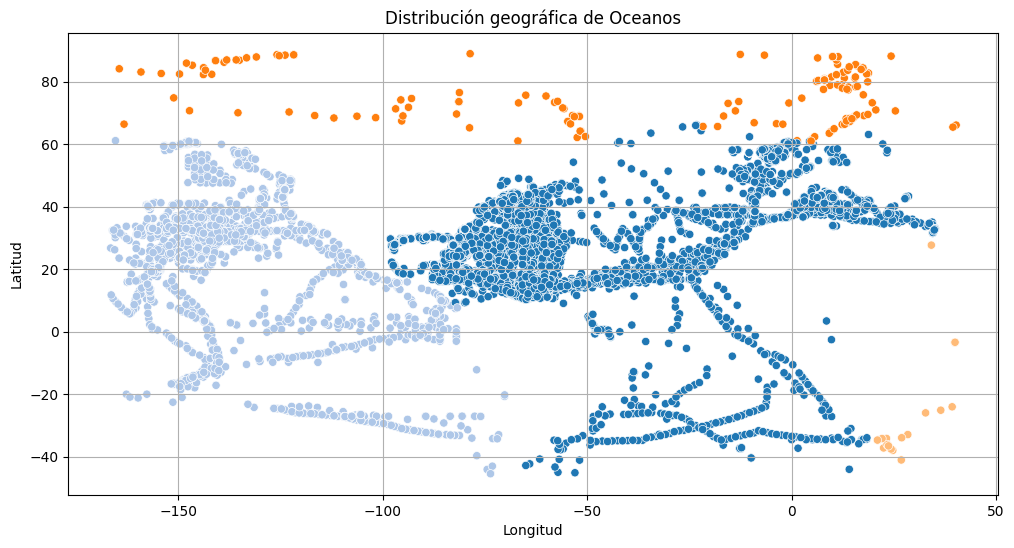

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sólo los datos con subregión conocida
df_known_sub = df_mp[df_mp['Oceans'].notnull()]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_known_sub, x='Longitude', y='Latitude', hue='Oceans', palette='tab20', legend=False)
plt.title("Distribución geográfica de Oceanos")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True) # Para sacar una cuadrícula
plt.show()


In [16]:
df_mp.isna().sum()/df_mp.shape[0]*100

OBJECTID             0.000000
Oceans               1.326805
Regions             56.499388
SubRegions          93.488372
Sampling Method      0.000000
Measurement         28.455324
Unit                 0.000000
Density Range        0.000000
Density Class        0.000000
Short Reference      0.000000
Long Reference       0.000000
DOI                  0.000000
Organization         0.000000
Keywords             0.088127
Accession Number     0.000000
Accession Link       0.000000
Latitude             0.000000
Longitude            0.000000
Date                 0.000000
GlobalID             0.000000
x                    0.000000
y                    0.000000
Lat_rounded          0.000000
Lon_rounded          0.000000
SubRegions_geo      93.488372
dtype: float64

In [17]:
# Lo primero quizás los océanos y Mesurement. Los océanos será facil con la latitud y la longitud

In [18]:
#Relacionar oceanos con Longitud y Latitud
df_mp[df_mp['Oceans'].notnull()].groupby('Oceans')[['Latitude', 'Longitude']].mean().sort_values('Latitude')

,Latitude,Longitude
Oceans,,
Indian Ocean,-26.203959,28.731356
Pacific Ocean,23.412917,-137.379422
Atlantic Ocean,28.981572,-65.054741
Arctic Ocean,77.023468,-40.293646
